In [5]:
import pandas as pd

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
players_json_data= "./shots_prob_emb_ds.json"

players_df = pd.read_json(players_json_data).T
players_df

,emb_0,emb_1,emb_2,name,position,team,id
17733,-2.499677,1.360883,7.071073,Lukas Podolski,F,Arsenal,17733
19524,-2.674822,1.411624,7.326234,Santi Cazorla,M,Arsenal,19524
15943,-2.567726,1.376288,7.273533,Thomas Vermaelen,D,Arsenal,15943
20467,-2.573912,1.343325,7.052621,Theo Walcott,F,Arsenal,20467
80254,-2.75456,1.458285,7.48171,Carl Jenkinson,D,Arsenal,80254
...,...,...,...,...,...,...,...
103912,-4.502722,1.489493,5.221742,Jordon Ibe,F,Liverpool,103912
92790,0.422836,6.731635,3.907287,Michael Harriman,D,Queens Park Rangers,92790
94738,-4.04571,5.307006,2.330507,Billy Knott,M,Sunderland,94738
76227,-5.313692,3.136131,3.519039,Fraser Fyvie,M,Wigan Athletic,76227


In [8]:
team_data = pd.read_json("../gui/p2v_viz/src/app/teamsData.json")
team_data.index = team_data["fullName"]
team_data

,fullName,web_image,color
fullName,,,
Manchester United,Manchester United,https://resources.premierleague.com/premierlea...,#DA291C
Manchester City,Manchester City,https://resources.premierleague.com/premierlea...,#6CABDD
Chelsea,Chelsea,https://resources.premierleague.com/premierlea...,#034694
Arsenal,Arsenal,https://resources.premierleague.com/premierlea...,#EF0107
Spurs,Spurs,https://resources.premierleague.com/premierlea...,#132257
Everton,Everton,https://resources.premierleague.com/premierlea...,#003399
Liverpool,Liverpool,https://resources.premierleague.com/premierlea...,#AA001B
West Bromwich Albion,West Bromwich Albion,https://resources.premierleague.com/premierlea...,#091453
Swansea City,Swansea City,https://resources.premierleague.com/premierlea...,#000000


In [9]:
X = players_df[["emb_0", "emb_1", "emb_2"]].values

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
colors = players_df["team"].apply(lambda x: team_data.loc[x]["color"])
colors

17733     #EF0107
19524     #EF0107
15943     #EF0107
20467     #EF0107
80254     #EF0107
           ...   
103912    #AA001B
92790     #0053A0
94738     #EB172B
76227     #001C58
106458    #001C58
Name: team, Length: 471, dtype: object

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

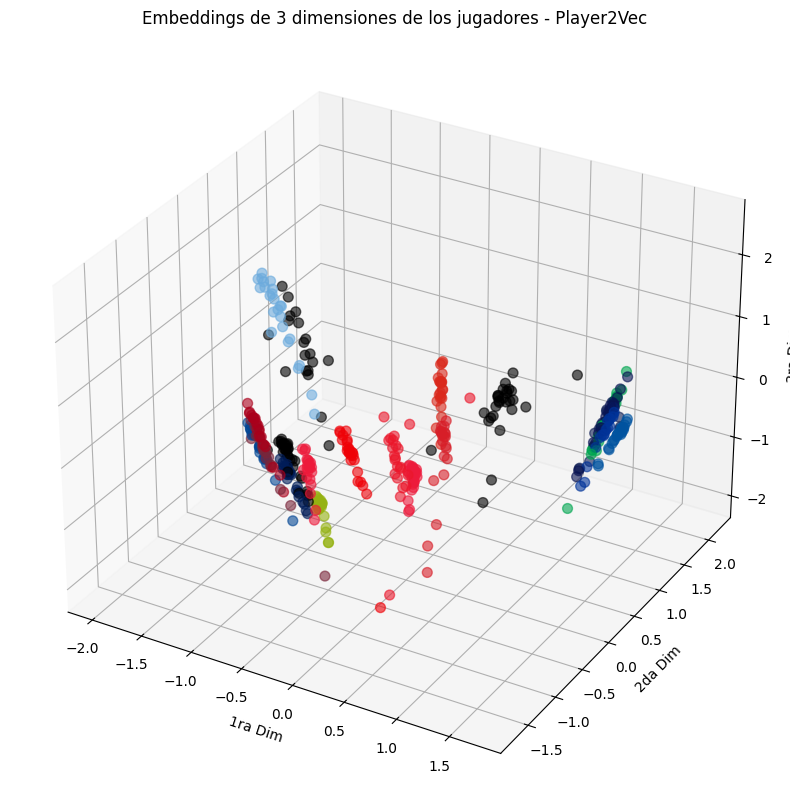

In [13]:
# emb_0	emb_1 emb_2

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, s=50, alpha=0.6, marker='o')

ax.set_xlabel('1ra Dim')
ax.set_ylabel('2da Dim')
ax.set_zlabel('3ra Dim')

ax.set_title('Embeddings de 3 dimensiones de los jugadores - Player2Vec')

plt.show()

# Save the figure
fig.savefig('../recursos_pdf/graficos/players_3d.png', dpi=fig.dpi)

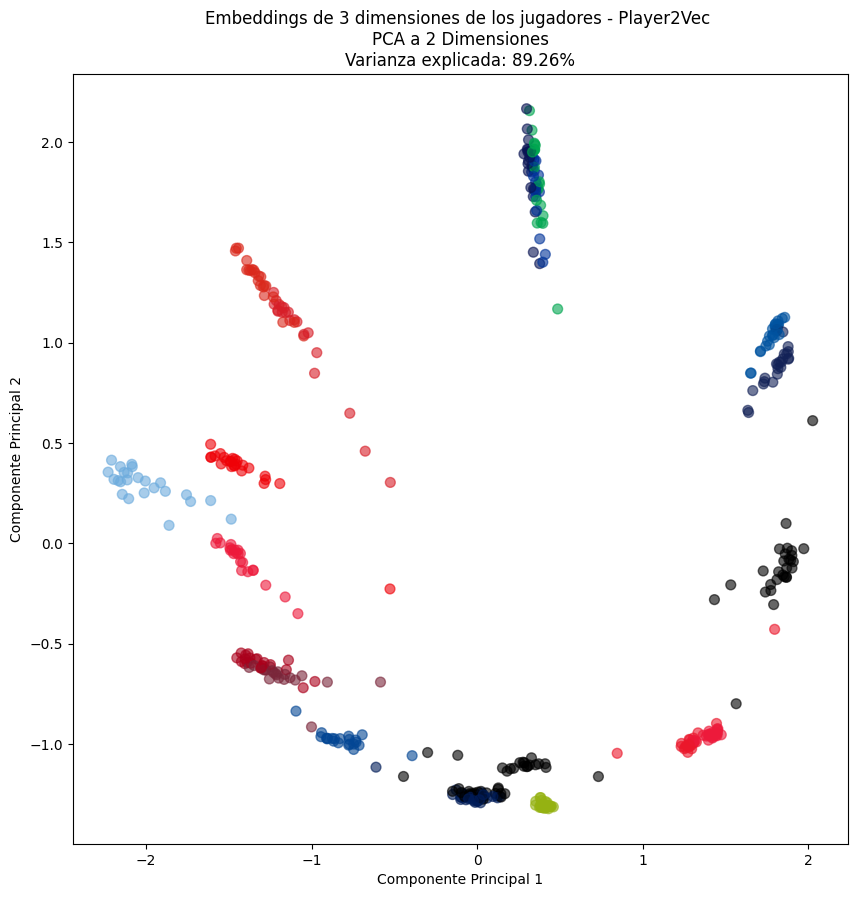

In [14]:
# PCA to 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50, alpha=0.6, marker='o')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

ax.set_title(
    f"Embeddings de 3 dimensiones de los jugadores - Player2Vec \nPCA a 2 Dimensiones\nVarianza explicada: {pca.explained_variance_ratio_.sum() * 100:.2f}%"
)

plt.show()

fig.savefig('../recursos_pdf/graficos/players_3d_2d.png', dpi=fig.dpi)

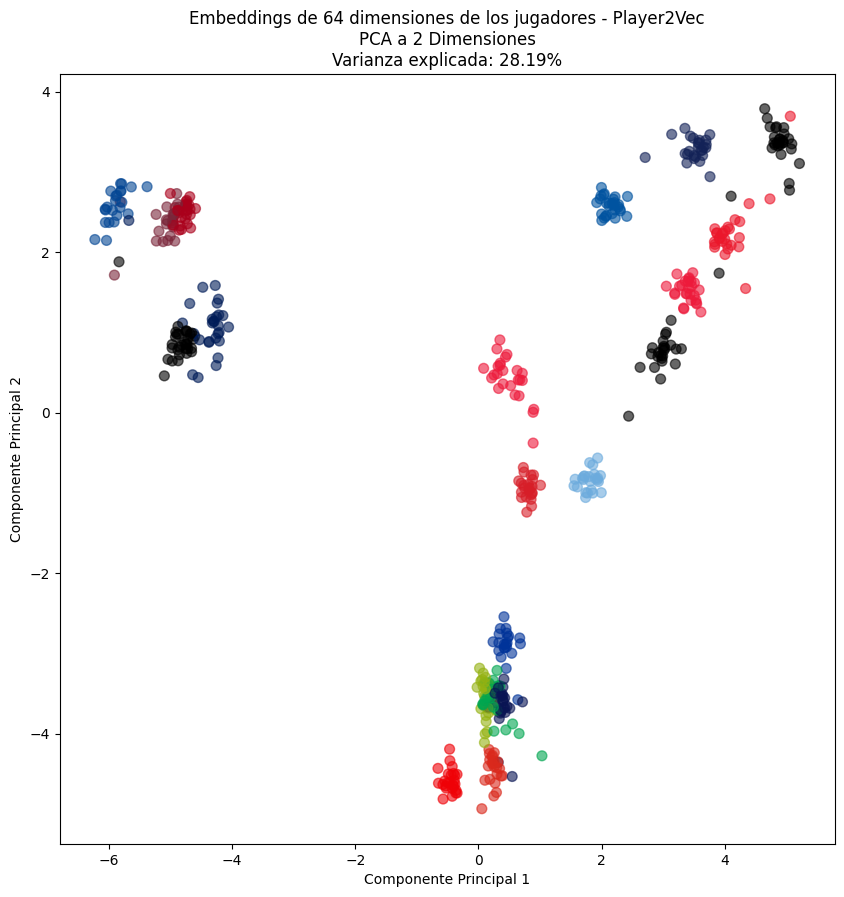

In [ ]:
players_json_data_64 = "./inverse_weighted_embeddings_64_64.json"
players_df_64 = pd.read_json(players_json_data_64).T
colors = players_df_64["team"].apply(lambda x: team_data.loc[x]["color"])
X_64 = players_df_64[[col for col in players_df_64.columns if "emb" in col]].values

scaler = StandardScaler()
X_64 = scaler.fit_transform(X_64)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_64)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50, alpha=0.6, marker='o')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

ax.set_title(
    f"Embeddings de 64 dimensiones de los jugadores - Player2Vec\nPCA a 2 Dimensiones\nVarianza explicada: {pca.explained_variance_ratio_.sum() * 100:.2f}%"
)

plt.show()

# fig.savefig('../recursos_pdf/graficos/players_64_2d.png', dpi=fig.dpi)